In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importamos y preparamos datos 

In [5]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
genderSub = pd.read_csv("gender_submission.csv")


y_train = X_train["Survived"]  
X_train = X_train.drop(columns="Survived")


X_test = pd.merge(genderSub, X_test, on="PassengerId", how="inner")
y_test = X_test["Survived"]  
X_test = X_test.drop(columns="Survived")

## Limpieza de datos

In [7]:
X_train.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
X_train = X_train.drop(
    columns = "Cabin"
)
X_test = X_test.drop(
    columns = "Cabin"
)

In [12]:
mediaTrain =  X_train["Age"].mean()
X_train["Age"] = X_train["Age"].fillna(mediaTrain)
X_train["Age"] = X_train["Age"].fillna(mediaTrain).astype(int)

In [13]:
mediaTest =  X_test["Age"].mean()
X_test["Age"] = X_test["Age"].fillna(mediaTest)
X_test["Age"] = X_test["Age"].fillna(mediaTest).astype(int)

In [14]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [15]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [16]:
mediaTestF =  X_test["Fare"].mean()
X_test["Fare"] = X_test["Fare"].fillna(mediaTestF)
X_test["Fare"] = X_test["Fare"].fillna(mediaTestF).astype(int)

In [17]:
modaTrainE =  X_train["Embarked"].mode()
X_train["Embarked"] = X_train["Embarked"].fillna(modaTrainE)
X_train["Embarked"] = X_train["Embarked"].fillna(modaTrainE)

## Analisis exploratorio


In [19]:
X_train['Survived'] = y_train
claseTR = X_train.groupby("Pclass").agg({
    "Survived": "sum"
}).reset_index()

In [20]:
X_train['Survived'] = y_train
SexoTR = X_train.groupby("Sex").agg({
    "Survived" : "sum"
}).reset_index()

In [21]:
X_train['rango'] = None

X_train.loc[X_train['Fare'].between(0, 50),      'rango'] = "0 - 50"
X_train.loc[X_train['Fare'].between(51, 150),    'rango'] = "51 - 150"
X_train.loc[X_train['Fare'].between(151, 250),   'rango'] = "151 - 250"
X_train.loc[X_train['Fare'] >= 251,              'rango'] = "251 - 515"

In [22]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,rango
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,0,0 - 50
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,51 - 150
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,1,0 - 50
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,51 - 150
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,0 - 50
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,0,0 - 50
887,888,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,1,0 - 50
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,0,0 - 50
889,890,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,1,0 - 50


In [23]:
X_train['Survived'] = y_train
CostoTR = X_train.groupby("rango").agg({
    "Survived" : "sum"
}).reset_index()

Text(0, 0.5, 'N° de sobrevivientes')

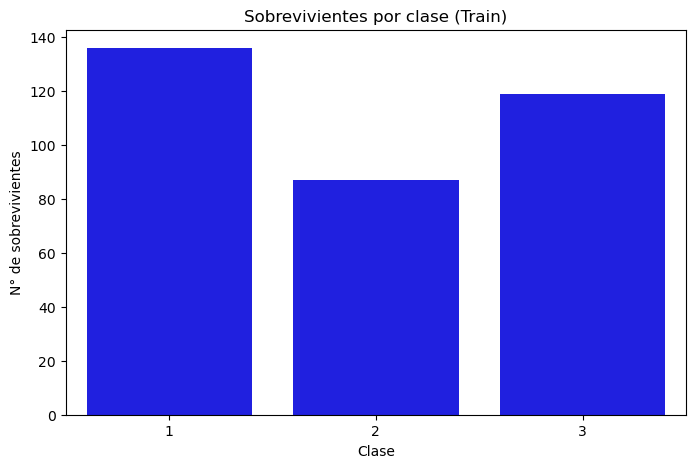

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=claseTR, x="Pclass", y="Survived", color="blue")

plt.title("Sobrevivientes por clase (Train)")
plt.xlabel("Clase")
plt.ylabel("N° de sobrevivientes")


In [25]:
print(claseTR)


   Pclass  Survived
0       1       136
1       2        87
2       3       119


Text(0, 0.5, 'N° de sobrevivientes')

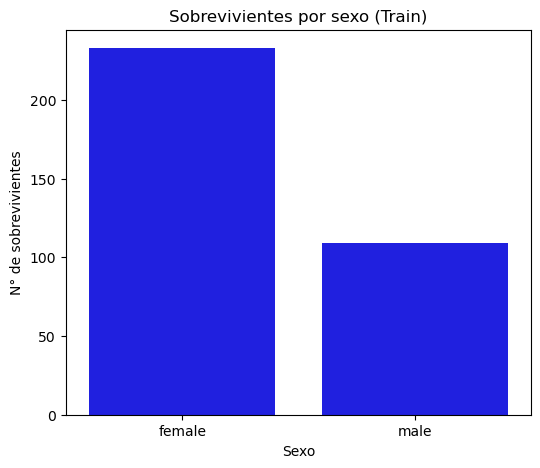

In [26]:
plt.figure(figsize=(6, 5))
sns.barplot(data=SexoTR, x="Sex", y="Survived", color="blue")

plt.title("Sobrevivientes por sexo (Train)")
plt.xlabel("Sexo")
plt.ylabel("N° de sobrevivientes")


In [27]:
print(SexoTR)


      Sex  Survived
0  female       233
1    male       109


Text(0, 0.5, 'N° de sobrevivientes')

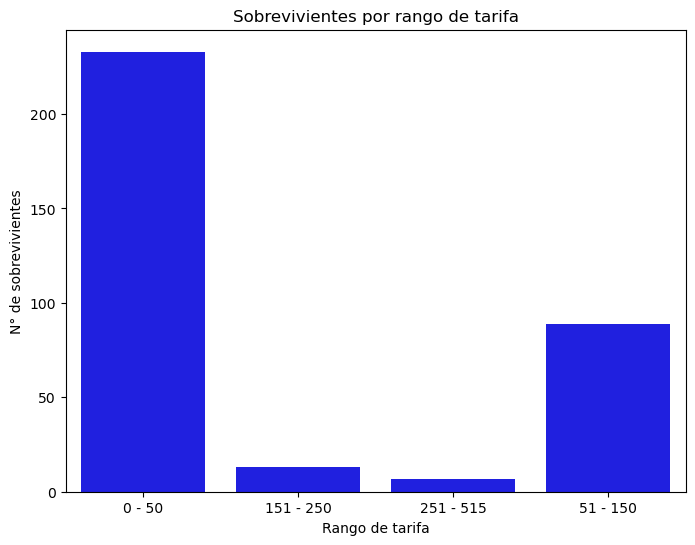

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(data=CostoTR, x="rango", y="Survived", color="blue")

plt.title("Sobrevivientes por rango de tarifa")
plt.xlabel("Rango de tarifa")
plt.ylabel("N° de sobrevivientes")

In [29]:
print(CostoTR)

       rango  Survived
0     0 - 50       233
1  151 - 250        13
2  251 - 515         7
3   51 - 150        89


In [30]:
X_train = X_train.drop(
    columns = "rango"
)


## GENERAMOS DUMMIES

In [32]:
X_train = pd.get_dummies(
    X_train,
    columns=['Pclass', 'Embarked', 'Sex'],
    drop_first=True
)

X_test = pd.get_dummies(
    X_test,
    columns=['Pclass', 'Embarked', 'Sex'],
    drop_first=True
)

In [33]:
X_train.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Survived', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S',
       'Sex_male'],
      dtype='object')

In [34]:
X_test.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

## Eliminar columnas con poca relevancia para el modelo

In [36]:
X_train = X_train.drop(
    columns = ["Ticket","Name","PassengerId"]
)
X_test = X_test.drop(
    columns = ["Ticket","Name","PassengerId"]
)

## AGREGAMOS COLUMNA ISMINOR

In [38]:
X_test["IsMinor"] = 0

for i in X_test.index:
    edad = X_test.loc[i, "Age"]       
    if edad <= 16:
        X_test.loc[i, "IsMinor"] = 1  
    else:
        X_test.loc[i, "IsMinor"] = 0

In [39]:
X_test.head(2)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34,0,0,7,False,True,True,False,True,0
1,47,1,0,7,False,True,False,True,False,0


In [40]:
X_train["IsMinor"] = 0

for i in X_train.index:
    edad = X_train.loc[i, "Age"]       
    if edad <= 16:
        X_train.loc[i, "IsMinor"] = 1  
    else:
        X_train.loc[i, "IsMinor"] = 0

In [41]:
X_train.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Survived      0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
Sex_male      0
IsMinor       0
dtype: int64

## AJUSTAMOS MODELO

In [43]:
X_train = X_train.drop(
    columns = "Survived")

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression(max_iter = 10000000)

In [46]:
rfe = RFE(lr, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

In [47]:
X_train.loc[:,rfe.support_]

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,22,1,0,7.2500,False,True,False,True,True,0
1,38,1,0,71.2833,False,False,False,False,False,0
2,26,0,0,7.9250,False,True,False,True,False,0
3,35,1,0,53.1000,False,False,False,True,False,0
4,35,0,0,8.0500,False,True,False,True,True,0
...,...,...,...,...,...,...,...,...,...,...
886,27,0,0,13.0000,True,False,False,True,True,0
887,19,0,0,30.0000,False,False,False,True,False,0
888,29,1,2,23.4500,False,True,False,True,False,0
889,26,0,0,30.0000,False,False,False,False,True,0


## VALIDAMOS MODELO

In [50]:
X_train_final = X_train.loc[:,rfe.support_]


In [51]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')

In [52]:
X_test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')

In [53]:
X_test_final = X_test.loc[:,rfe.support_]

In [55]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [60]:
X_train_final = X_train.loc[:,rfe.support_]
X_test_final = X_test.loc[:,rfe.support_]

In [63]:
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X_train_final, y_train)

LogisticRegression(max_iter=100000)

In [66]:
y_pred = logreg.predict(X_test_final)
y_pred_proba = logreg.predict_proba(X_test_final)[:, 1]

In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
y_pred_proba

array([0.11870347, 0.38292308, 0.18371703, 0.09644208, 0.49251772,
       0.27493227, 0.66913447, 0.18073869, 0.73087789, 0.05729076,
       0.09017256, 0.31599996, 0.90190905, 0.09695915, 0.82840466,
       0.84745997, 0.2998937 , 0.15622884, 0.4977    , 0.59081507,
       0.30539108, 0.26234941, 0.90354854, 0.55170207, 0.90760322,
       0.04167714, 0.94265414, 0.15316924, 0.34536573, 0.06858528,
       0.12704924, 0.15675462, 0.39814139, 0.41794709, 0.43913262,
       0.16570672, 0.57636165, 0.62678221, 0.10095454, 0.10730663,
       0.09608467, 0.40182942, 0.07116648, 0.81581016, 0.83001223,
       0.10024188, 0.42003873, 0.12884905, 0.89349637, 0.47008827,
       0.37592783, 0.34642909, 0.6979475 , 0.84979771, 0.33071195,
       0.11029981, 0.08102362, 0.10024188, 0.06541225, 0.96835565,
       0.11843274, 0.23612768, 0.11601156, 0.70919071, 0.77238802,
       0.82049742, 0.72810884, 0.32462423, 0.50025474, 0.80784633,
       0.69944594, 0.10900471, 0.5811059 , 0.5168123 , 0.96244

In [77]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [80]:
matriz_confusion = confusion_matrix(y_test, y_pred)

In [83]:
pd.DataFrame(
    {"y_real" : y_test, 
     "y_pred": y_pred}
).groupby(["y_pred", "y_real"]).size()

y_pred  y_real
0       0         252
        1          16
1       0          14
        1         136
dtype: int64

11. Calcular Accuracy

In [86]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

In [88]:
## Accuracy
(TN + TP) / (TN + TP + FN + FP)

0.9282296650717703

In [90]:
TP / (TP + FN)

0.8947368421052632

In [92]:
TN / (TN + FP)

0.9473684210526315

In [94]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

In [96]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x

<Axes: >

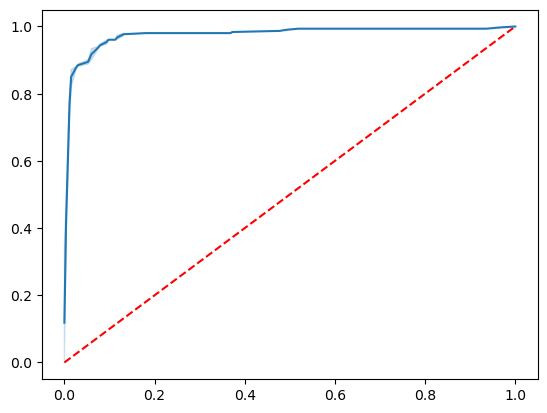

In [98]:
sns.lineplot(x = recta_x, y = recta_y, ls = "--",  color = "red")
sns.lineplot(x = especificidad_inv, y = sensibilidad)

In [100]:
roc_auc_score(y_test, y_pred_proba)

0.9760091017016225